<a href="https://colab.research.google.com/github/AlirezaPNouri/Storytelling/blob/main/Experiment_comparison_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this class, i will examine the performance of different methods and analyze their results

In [22]:
import pickle


In [213]:
dataset = 'covid' # ['NYT', 'covid']

if dataset == 'covid':
  doc2vec_Embed_dict = pickle.load(open('doc_2vec_covid_Embed_dict.p', 'rb'))
  doc2vec_full_story = pickle.load(open('doc_2vec_covid_full_story.p', 'rb'))
  doc2ve_list_of_dfs= pickle.load(open('doc_2vec_covid_list_of_dfs.p', 'rb'))
  doc2vec_full_story = [x for x in doc2vec_full_story if len(x)<500]

  ji_Embed_dict = pickle.load(open('JI_covid_Embed_dict.p', 'rb'))
  ji_full_story = pickle.load(open('JI_covid_full_story.p', 'rb'))
  ji_list_of_df = pickle.load(open('JI_covid_list_of_dfs.p', 'rb'))
  ji_full_story = [x for x in ji_full_story if len(x)<500]

  bert_Embed_dict = pickle.load(open('Bert_covid_Embed_dict.p', 'rb'))
  bert_full_story = pickle.load(open('Bert_covid_full_story.p', 'rb'))
  bert_full_story = [x for x in bert_full_story if len(x)<500]

  proposed_embed = pickle.load(open('emb__covid.p', 'rb'))
  proposed_Embed_dict = pickle.load(open('drive/MyDrive/temp/Embed_dict_covid.p', 'rb'))
  proposed_final_weight = pickle.load(open('final_weight_covid.p', 'rb'))
  proposed_full_story = pickle.load(open('full_story_covid.p', 'rb'))
  proposed_full_story = [x for x in proposed_full_story if len(x)<500]
  topic_n = 5
  
elif dataset == 'NYT':
  doc2vec_Embed_dict = pickle.load(open('doc_2vec_NYT_Embed_dict.p', 'rb'))
  doc2vec_full_story = pickle.load(open('doc_2vec_NYT_full_story.p', 'rb'))
  doc2ve_list_of_dfs= pickle.load(open('doc_2vec_NYT_list_of_dfs.p', 'rb'))
  doc2vec_full_story = [x for x in doc2vec_full_story if len(x)<500]

  ji_Embed_dict = pickle.load(open('JI_NYT_Embed_dict.p', 'rb'))
  ji_full_story = pickle.load(open('JI_NYT_full_story.p', 'rb'))
  ji_full_story = [x for x in ji_full_story if len(x)<500]
  ji_list_of_df = pickle.load(open('JI_NYT_list_of_dfs.p', 'rb'))

  bert_Embed_dict = pickle.load(open('Bert_NYT_Embed_dict.p', 'rb'))
  bert_full_story = pickle.load(open('Bert_NYT_full_story.p', 'rb'))
  bert_list_of_df = pickle.load(open('Bert_NYT_list_of_dfs.p', 'rb'))
  bert_full_story = [x for x in bert_full_story if len(x)<500]

  proposed_embed = pickle.load(open('emb_.p', 'rb'))
  proposed_Embed_dict = pickle.load(open('drive/MyDrive/temp/Embed_dict.p', 'rb'))
  proposed_final_weight = pickle.load(open('final_weight.p', 'rb'))
  proposed_full_story = pickle.load(open('full_story.p', 'rb'))
  proposed_list_of_dfs = pickle.load(open('list_of_dfs.p', 'rb'))
  proposed_full_story = [x for x in proposed_full_story if len(x)<500]
  topic_n = 5
else:
  print('dataset does not exist!')



In [218]:
bert_embedding = bert_Embed_dict[0]
proposed_embedding = proposed_embed[0]
total_doc_BERT =sum([len(bert_embedding[x].keys()) for x in bert_embedding.keys()])
total_doc_doc2vec = sum([len(doc2vec_Embed_dict[x].keys()) for x in doc2vec_Embed_dict.keys()])
total_doc_ji = sum([len(ji_Embed_dict[x].keys()) for x in ji_Embed_dict.keys()])           
total_doc_proposed = sum([len(proposed_embedding[x].keys()) for x in proposed_embedding.keys()])

In [188]:
import numpy as np
def normalize_vec(vec):
  """
  # this function will receive a vector and the min and max of that vector and will return the normalized vec 
  """
  n_ = np.array(vec)
  z_ = n_ / np.sqrt(np.sum(n_*n_)+0.0000001)
  return z_.tolist()


In [219]:
bert_total_dict = dict()
for t_ in bert_embedding.keys():
  for d_ in bert_embedding[t_].keys():
    bert_total_dict[d_] = bert_embedding[t_][d_]
bert_story_embed = list()
for st_ in bert_full_story:
  temp_list = list()
  for ind, ind_1 in zip(st_[:-1], st_[1:]):
    try:
      temp_list.append(bert_total_dict[ind][ind_1])
    except:
      pass
  bert_story_embed.append(normalize_vec(temp_list))




In [220]:
doc2vec_total_dict = dict()
for t_ in doc2vec_Embed_dict.keys():
  for d_ in doc2vec_Embed_dict[t_].keys():
    doc2vec_total_dict[d_] = doc2vec_Embed_dict[t_][d_]
doc2vec_story_embed = list()
for st_ in doc2vec_full_story:
  temp_list = list()
  for ind, ind_1 in zip(st_[:-1], st_[1:]):
    try:
      temp_list.append(doc2vec_total_dict[ind][ind_1])
    except:
      pass
  doc2vec_story_embed.append(normalize_vec(temp_list))

In [221]:
ji_total_dict = dict()
for t_ in ji_Embed_dict.keys():
  for d_ in ji_Embed_dict[t_].keys():
    ji_total_dict[d_] = ji_Embed_dict[t_][d_]
ji_story_embed = list()
for st_ in ji_full_story:
  temp_list = list()
  for ind, ind_1 in zip(st_[:-1], st_[1:]):
    try:
      temp_list.append(ji_total_dict[ind][ind_1])
    except:
      pass
  ji_story_embed.append(normalize_vec(temp_list))

In [222]:
proposed_embedding = proposed_embed[0]

proposed_total_dict = dict()
for t_ in proposed_embedding.keys():
  for d_ in proposed_embedding[t_].keys():
    proposed_total_dict[d_] = proposed_embedding[t_][d_]
proposed_story_embed = list()
for st_ in proposed_full_story:
  temp_list = list()
  for ind, ind_1 in zip(st_[:-1], st_[1:]):
    try:
      temp_list.append(proposed_total_dict[ind][ind_1])
    except:
      pass
  proposed_story_embed.append(normalize_vec(temp_list))

In [223]:
# before normalization
print(bert_story_embed)
print(doc2vec_story_embed)
print(ji_story_embed)
print(proposed_story_embed)




[[0.15296669424823792, 0.16123516420760212, 0.15916804671776105, 0.14263110679903265, 0.1364297543295095, 0.12609416688030423, 0.16123516420760212, 0.15296669424823792, 0.16743651667712528, 0.16330228169744318, 0.16123516420760212, 0.15710092922792002, 0.17157075165680738, 0.15503381173807895, 0.13849687181935053, 0.14263110679903265, 0.16743651667712528, 0.15089957675839685, 0.14263110679903265, 0.13849687181935053, 0.15503381173807895, 0.16950363416696634, 0.15503381173807895, 0.16743651667712528, 0.16743651667712528, 0.17777210412633054, 0.20464463149426423, 0.17777210412633054, 0.17363786914664844, 0.18190633910601264, 0.20464463149426423, 0.2191144539231516, 0.23771851133172106, 0.23358427635203896, 0.17363786914664844], [0.1543213228756086, 0.14430045775381584, 0.13828793868074016, 0.1322754196076645, 0.12225455448587175, 0.15632549589996714, 0.1503129768268915, 0.13427959263202305, 0.13828793868074016, 0.16233801497304282, 0.14630463077817438, 0.13828793868074016, 0.134279592632

In [224]:
def LEM(set_stories, ND, NS, NTS, NT):
  res = 0
  story_len = [len(x) for x in set_stories]
  res = (ND*NS) / (NTS * NT * sum(story_len))
  return res


In [225]:
LEM_BERT = LEM(bert_full_story, total_doc_BERT, len(bert_full_story), len(bert_embedding.keys()), topic_n)
LEM_doc2vec = LEM(doc2vec_full_story, total_doc_doc2vec, len(doc2vec_full_story), len(doc2vec_Embed_dict.keys()), topic_n)
LEM_JI = LEM(ji_full_story, total_doc_ji, len(ji_full_story), len(ji_Embed_dict.keys()), topic_n)
LEM_proposed = LEM(proposed_full_story, total_doc_proposed, len(proposed_full_story), len(proposed_embedding.keys()), topic_n)     # for covid proposed method has the highest value and doc2vec has the second rank
print('For dataset ', dataset, ', LEM value for different methods are: ')
print('\t for BERT: ', LEM_BERT)
print('\t for DOC2VEC: ', LEM_doc2vec)
print('\t for Jaccard Index: ', LEM_JI)
print('\t for proposed method: ', LEM_proposed)

For dataset  covid , LEM value for different methods are: 
	 for BERT:  0.13216619981325864
	 for DOC2VEC:  0.1417689393939394
	 for Jaccard Index:  0.038772038772038775
	 for proposed method:  0.1520408163265306


In [226]:
def NS_fun(story_embed_):
  res = list()
  for x in story_embed_:
    res.append(sum(x)/len(x))
  mean = np.mean(res)
  sd = np.std(res)
  return (np.pi*sd) * np.exp(-0.5*((res-mean)/sd)**2)
  

In [227]:
# print(NS_fun(bert_story_embed))
# print(NS_fun(doc2vec_story_embed))
# print(NS_fun(ji_story_embed))
# print(NS_fun(proposed_story_embed))

bert_NS = NS_fun(bert_story_embed)
doc2vec_NS = NS_fun(doc2vec_story_embed)
ji_NS = NS_fun(ji_story_embed)
proposed_NS = NS_fun(proposed_story_embed)
print(' for dataset ', dataset)
print('NS value for bert model is :', sum(bert_NS) / len(bert_NS))
print('NS value for doc2vec model is :',sum(doc2vec_NS) / len(doc2vec_NS))
print('NS value for Jaccard Index model is :',sum(ji_NS) / len(ji_NS))
print('NS value for proposed method is :',sum(proposed_NS) / len(proposed_NS))

 for dataset  covid
NS value for bert model is : 0.006188702614176683
NS value for doc2vec model is : 0.01152224520831921
NS value for Jaccard Index model is : 0.0011146162360453876
NS value for proposed method is : 0.005854365866070975


In [228]:
def disp(d_i, d_j, n, teta, i, j):
  a = np.array(d_i)
  b = np.array(d_j)
  dist = np.sqrt(np.sum(np.square(a-b)))
  if dist < teta:
    return 1/(n+i-j)
  else:
    return 0



In [229]:
def final_disp(story_, teta):
  res = list()
  for i in range(len(story_)):
    for j in range(i+1, len(story_)):
      res.append(disp(story_[i], story_[j], len(story_), teta, i, j))
  return sum(res)/len(res)


In [200]:
# for doc in ji_full_story:
#   print(len(doc))
# print('-----------------------------')
# for doc in doc2vec_full_story:
#   print(len(doc))
# print('-----------------------------')
# for doc in proposed_full_story:
#   print(len(doc))
# print('-----------------------------')
# for doc in bert_full_story:
#   print(len(doc))

45
52
61
52
46
47
48
48
49
50
58
50
62
61
43
-----------------------------
84
55
80
77
45
84
45
41
47
46
45
77
52
46
77
80
83
45
47
55
68
77
45
46
46
48
76
70
53
41
84
68
50
86
63
46
49
74
71
67
48
87
65
46
52
65
48
63
57
78
69
86
71
85
47
48
84
50
64
75
42
66
45
51
50
72
51
49
45
41
55
74
70
42
80
47
85
55
45
53
65
42
88
55
42
49
70
50
86
83
42
44
68
66
48
43
77
63
56
46
47
47
78
48
49
48
78
77
51
81
74
46
67
55
49
66
77
80
-----------------------------
91
85
94
83
82
81
82
88
91
82
90
92
94
83
91
86
96
88
81
81
-----------------------------
138
138
138


In [230]:
disp_list_bert = list()
disp_list_doc2vec = list()
disp_list_ji = list()
disp_list_proposed = list()
for teta in np.arange(0.01, 0.1, 0.01):
  disp_list_bert.append([final_disp(x, teta) for x in bert_story_embed])
  disp_list_doc2vec.append([final_disp(x, teta) for x in doc2vec_story_embed])
  disp_list_ji.append([final_disp(x, teta) for x in ji_story_embed])
  disp_list_proposed.append([final_disp(x, teta) for x in proposed_story_embed])

In [231]:
z_disp_list_bert = [sum(x) for x in disp_list_bert]
z_disp_list_doc2vec = [sum(x) for x in disp_list_doc2vec]
z_disp_list_ji = [sum(x) for x in disp_list_ji]
z_disp_list_proposed = [sum(x) for x in disp_list_proposed]

In [232]:
print('in dataset of ', dataset,' and for the best teta for each model:')
print('Average Disp value for bert model is: ', max(z_disp_list_bert))
print('Average Disp value for doc2vec model is: ', max(z_disp_list_doc2vec))
print('Average Disp value for Jaccard Index model is: ', max(z_disp_list_ji))
print('Average Disp value for proposed method is: ', max(z_disp_list_proposed))

in dataset of  covid  and for the best teta for each model:
Average Disp value for bert model is:  1.7246181813417492
Average Disp value for doc2vec model is:  0.4793976919132084
Average Disp value for Jaccard Index model is:  0.23906299714034668
Average Disp value for proposed method is:  1.2451756483099508


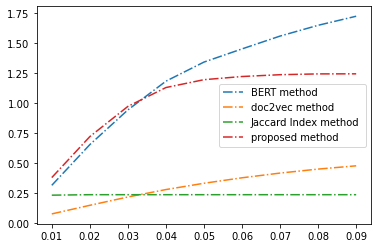

In [233]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# create data


y = z_disp_list_bert
x = np.arange(0.01, 0.1, 0.01)
plt.plot(x, y, label = "BERT method ", linestyle="-." )

y = z_disp_list_doc2vec
plt.plot(x, y, label = "doc2vec method ", linestyle="-." )

y = z_disp_list_ji
plt.plot(x, y, label = "Jaccard Index method ", linestyle="-." )

y = z_disp_list_proposed
plt.plot(x, y, label = "proposed method ", linestyle="-." )

plt.legend()
plt.show()